# Contents

1. Setup
2. Read in variables from YAML configuration file
3. Read & process the Internal Data
4. Read & process the Stock Data
5. Read & process the Commodity Data
6. Read & process the Exchange Rate Data
7. Read & process the Economic Data
8. Read & process the Social Media Data
9. Merge all the data into one DF
10. Add cyclical time features to the data
11. Look for correlations
12. Add the shifted price columns
13. Output the fully processed data

# --------------------------------------------------------------------------------------------------------
# 1. Setup
# --------------------------------------------------------------------------------------------------------

### Install relevant packages

In [1]:
#pip install pandas-profiling

### Import packages

##### General packages

In [2]:
import pandas as pd
from tqdm.auto import tqdm
from pprint import pprint
import os

##### Packages for importing variables from YAML file

In [3]:
import yaml

### Configure max rows and max columns¶

In [4]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 100)

### Remove SettingWithCopyWarning Warning

In [123]:
pd.options.mode.chained_assignment = None

### Load in the '.py' file containg the functions used in this notebook

In [5]:
%load_ext autoreload
%autoreload 1

In [6]:
# data collection functions
%aimport data_collection_functions
import data_collection_functions as dc

In [7]:
# data processing functions
%aimport data_processing_functions
import data_processing_functions as dp

# --------------------------------------------------------------------------------------------------------
# 2. Read in variables from YAML configuration file
# --------------------------------------------------------------------------------------------------------

In [8]:
# define the path to the scraped data directory & the price shift periods to add to the data
with open("../../config_files/config.yaml", "r") as variables:
    config = yaml.load(variables, Loader=yaml.FullLoader)
    data_directory = config["data_directory"]
    periods_in_days = config["shift_periods_in_days_list"]
    
scrape_directory = os.path.join(data_directory, "Scraped_data")
process_directory = os.path.join(data_directory, "Processed_data")

In [9]:
# read in YAML configuration file
with open("../../config_files/scrape_config.yaml", "r") as variables:
    config_variables = yaml.load(variables, Loader=yaml.FullLoader)

In [10]:
profile_report_directory = config_variables["profile_report_directory"]

# --------------------------------------------------------------------------------------------------------
# 3. Read & process the *Internal Data*
# --------------------------------------------------------------------------------------------------------

### Read in internal bitcoin data

In [11]:
list_of_dfs = dp.read_raw_internal_data_into_list(scrape_directory, config_variables)

### Merge the data from both of these different sources

In [12]:
merged_internal_data = dp.merge_internal_dfs(list_of_dfs, config_variables)

### Fill in the Nan values using interpolation

This data should contain values for everyday and the exchanges do not close at the weekend, however, there was quite a few missing values across this scraped data.
Interpolation was used here instead of forward filling. This is because we felt the data should have been changing between readings and not staying the same till the next reading.
One reason why it maybe didn't change, in our case, would be because of flaws in the data collection step of the websites we scraped the data from.

In [13]:
processed_internal_data = merged_internal_data.interpolate(axis=0)

### Manually inspect the dataframe

In [14]:
processed_internal_data.shape

(4714, 890)

In [15]:
processed_internal_data.head()

date  trading_volume  trades_per_minute  volatility  \
0  2009-01-01             NaN                NaN         NaN   
1  2009-01-02             NaN                NaN         NaN   
2  2009-01-03             NaN                NaN         NaN   
3  2009-01-04             NaN                NaN         NaN   
4  2009-01-05             NaN                NaN         NaN   

   bid_and_ask_spread  bid_and_ask_sum_asks  bid_and_ask_sum_bids  \
0                 NaN                   NaN                   NaN   
1                 NaN                   NaN                   NaN   
2                 NaN                   NaN                   NaN   
3                 NaN                   NaN                   NaN   
4                 NaN                   NaN                   NaN   

   time_between_blocks  block_size_votes  rank_bit_x  rank_bitfinex  \
0                  NaN               NaN         NaN            NaN   
1                  NaN               NaN         NaN            NaN   
2                  NaN               NaN         NaN            NaN   
3                  NaN               NaN         NaN            NaN   
4                  NaN               NaN         NaN            NaN   

   rank_bitstamp  rank_btce  rank_coinbase  rank_itbit  rank_kraken  \
0            NaN        NaN            NaN         NaN          NaN   
1            NaN        NaN            NaN         NaN          NaN   
2            NaN        NaN            NaN         NaN          NaN   
3            NaN        NaN            NaN         NaN          NaN   
4            NaN        NaN            NaN         NaN          NaN   

   rank_mtgox  rank_okcoin  rank_others  marketcap3sma  marketcap7sma  \
0         NaN          NaN          NaN            NaN            NaN   
1         NaN          NaN          NaN            NaN            NaN   
2         NaN          NaN          NaN            NaN            NaN   
3         NaN          NaN          NaN            NaN            NaN   
4         NaN          NaN          NaN            NaN            NaN   

   marketcap14sma  marketcap30sma  marketcap90sma  marketcap3ema  \
0             NaN             NaN             NaN            NaN   
1             NaN             NaN             NaN            NaN   
2             NaN             NaN             NaN            NaN   
3             NaN             NaN             NaN            NaN   
4             NaN             NaN             NaN            NaN   

   marketcap7ema  marketcap14ema  marketcap30ema  marketcap90ema  \
0            NaN             NaN             NaN             NaN   
1            NaN             NaN             NaN             NaN   
2            NaN             NaN             NaN             NaN   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   marketcap3wma  marketcap7wma  marketcap14wma  marketcap30wma  \
0            NaN            NaN             NaN             NaN   
1            NaN            NaN             NaN             NaN   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

   marketcap90wma  marketcap3trx  marketcap7trx  marketcap14trx  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2             NaN            NaN            NaN             NaN   
3             NaN            NaN            NaN             NaN   
4             NaN            NaN            NaN             NaN   

   marketcap30trx  marketcap90trx  marketcap3mom  marketcap7mom  \
0             NaN             NaN            NaN            NaN   
1             NaN             NaN            NaN            NaN   
2             NaN             NaN            NaN            NaN   
3             NaN       

In [16]:
processed_internal_data.tail()

date  trading_volume  trades_per_minute  volatility  \
4709  2021-11-23     7344.775987         148.998472  146.138655   
4710  2021-11-24     5661.806460         119.848889  112.522703   
4711  2021-11-25     5057.482717         112.791806  108.654990   
4712  2021-11-26    12721.213799         213.395278  154.675175   
4713  2021-11-27     3933.096895         106.621806  117.585485   

      bid_and_ask_spread  bid_and_ask_sum_asks  bid_and_ask_sum_bids  \
4709            1.832420          3.076634e+07          1.133168e+08   
4710            1.513739          3.204000e+07          1.002368e+08   
4711            1.540022          3.668729e+07          1.006372e+08   
4712            1.920435          3.668729e+07          1.006372e+08   
4713            1.974035          3.668729e+07          1.006372e+08   

      time_between_blocks  block_size_votes  rank_bit_x  rank_bitfinex  \
4709             8.141667              20.0    0.020772    2056.002710   
4710             8.141667              20.0    0.021572    2058.125500   
4711             8.141667              20.0    0.020861    1931.775241   
4712             8.141667              20.0    0.020210    1705.968533   
4713             8.141667              20.0    0.019612    1824.702467   

      rank_bitstamp    rank_btce  rank_coinbase  rank_itbit  rank_kraken  \
4709     339.029042  1198.635333    1140.546447  251.796533   590.346259   
4710     366.272559  1198.635333    1140.771794  251.796533   594.514759   
4711     369.658249  1198.635333    1351.680054  251.796533   467.783480   
4712     385.889296  1198.635333    1351.680054  251.796533   479.332281   
4713     323.379920  1198.635333    1351.680054  251.796533   500.738833   

      rank_mtgox  rank_okcoin  rank_others  marketcap3sma  marketcap7sma  \
4709   23.146947  1123.792028   155.985613   1.090987e+12   1.100491e+12   
4710   23.146947  1123.792028   161.251842   1.076167e+12   1.092176e+12   
4711   23.146947  1123.792028   158.377601   1.081359e+12   1.089876e+12   
4712   23.146947  1123.792028   151.294237   1.075359e+12   1.086558e+12   
4713   23.146947  1123.792028   159.430844   1.062275e+12   1.075901e+12   

      marketcap14sma  marketcap30sma  marketcap90sma  marketcap3ema  \
4709    1.157384e+12    1.165822e+12    1.021918e+12   1.085656e+12   
4710    1.143873e+12    1.162191e+12    1.023935e+12   1.078588e+12   
4711    1.134865e+12    1.159615e+12    1.026175e+12   1.088573e+12   
4712    1.123807e+12    1.157380e+12    1.027699e+12   1.072286e+12   
4713    1.111228e+12    1.153951e+12    1.029009e+12   1.052278e+12   

      marketcap7ema  marketcap14ema  marketcap30ema  marketcap90ema  \
4709   1.107427e+12    1.134102e+12    1.140030e+12    1.043209e+12   
4710   1.098451e+12    1.125758e+12    1.135610e+12    1.043831e+12   
4711   1.098478e+12    1.122131e+12    1.133220e+12    1.045034e+12   
4712   1.087858e+12    1.113314e+12    1.128238e+12    1.045275e+12   
4713   1.073961e+12    1.102508e+12    1.122046e+12    1.044989e+12   

      marketcap3wma  marketcap7wma  marketcap14wma  marketcap30wma  \
4709   1.083990e+12   1.093571e+12    1.125953e+12    1.158195e+12   
4710   1.074257e+12   1.086328e+12    1.114505e+12    1.152111e+12   
4711   1.085452e+12   1.087923e+12    1.108463e+12    1.148005e+12   
4712   1.072772e+12   1.079454e+12    1.097947e+12    1.141320e+12   
4713   1.051227e+12   1.065882e+12    1.085742e+12    1.133249e+12   

      marketcap90wma  marketcap3trx  marketcap7trx  marketcap14trx  \
4709    1.089329e+12         -0.923         -0.731          -0.005   
4710    1.090419e+12         -0.862         -0.770          -0.064   
4711    1.092059e+12         -0.407         -0.747          -0.113   
4712    1.092714e+12         -0.563         -0.746          -0.162   
4713    1.092815e+12         -0.924         -0.778          -0.212   

      marketcap30trx  marketcap90trx  marketcap3mom  marketcap7mom  \
4709           0.451           0.215  -3.287053e+10

### Check where the NaN values in this data are

In [17]:
processed_internal_nan_col_dates = dc.find_col_nan_ranges(processed_internal_data)

889/890 columns had a 'NaN' value in them


In [18]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_internal_nan_col_dates, n_cols_to_print=100)

rank_bit_x                  --> 2015-08-16
rank_coinbase               --> 2015-01-25
bid_and_ask_sum_bids        --> 2015-01-25
bid_and_ask_sum_asks        --> 2015-01-25
tweets90trx                 --> 2015-01-01
rank_okcoin                 --> 2014-07-28
tweets90rsi                 --> 2014-07-07
tweets90roc                 --> 2014-07-07
tweets90mom                 --> 2014-07-07
tweets90wma                 --> 2014-07-06
tweets90var                 --> 2014-07-06
tweets90std                 --> 2014-07-06
tweets90sma                 --> 2014-07-06
tweets90ema                 --> 2014-07-06
tweets30trx                 --> 2014-07-05
tweets14trx                 --> 2014-05-18
tweets30rsi                 --> 2014-05-08
tweets30roc                 --> 2014-05-08
tweets30mom                 --> 2014-05-08
tweets30wma                 --> 2014-05-07
tweets30var                 --> 2014-05-07
tweets30std                 --> 2014-05-07
tweets30sma                 --> 2014-05-07
tweets30ema

### Store this processed internal data

In [19]:
processed_internal_data.to_csv(os.path.join(process_directory, "processed_internal_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 4. Read & process the *Stock Data*
# --------------------------------------------------------------------------------------------------------

### Read in the stock data

In [20]:
list_of_stock_dfs = dp.read_data_into_list(scrape_directory, "stock_data")

### Merge the data from these different sources

This step would usually be needed, however, in the case of this research we only had one place where we scraped stock data and so the above list should only be of length 1. As a result, we can just use this data itself.

In [21]:
merged_stock_data = list_of_stock_dfs[0]

### Fill in the weekend values of this dataframe

We fill the weekend values into this scraped dataframe so that we have data for each day between the start date and the current date.
For weekend values and other holidays, we set the volume to **0** and the price is taken as the last traded price (close price for previous market trading day).

In [22]:
processed_stock_data = dp.fill_in_missing_values(merged_stock_data)

### Check where the NaN values in this data are

In [23]:
processed_stock_nan_col_dates = dc.find_col_nan_ranges(processed_stock_data)

112/139 columns had a 'NaN' value in them


In [24]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_stock_nan_col_dates, n_cols_to_print=100)

taiwan_exchange_open        --> 2009-01-04
taiwan_exchange_low         --> 2009-01-04
taiwan_exchange_high        --> 2009-01-04
taiwan_exchange_close       --> 2009-01-04
japan_nikkei_225_open       --> 2009-01-04
japan_nikkei_225_low        --> 2009-01-04
japan_nikkei_225_high       --> 2009-01-04
japan_nikkei_225_close      --> 2009-01-04
indonesia_exchange_open     --> 2009-01-04
indonesia_exchange_low      --> 2009-01-04
indonesia_exchange_high     --> 2009-01-04
indonesia_exchange_close    --> 2009-01-04
euro_stoxx_50_open          --> 2009-01-04
euro_stoxx_50_low           --> 2009-01-04
euro_stoxx_50_high          --> 2009-01-04
euro_stoxx_50_close         --> 2009-01-04
vix_open                    --> 2009-01-01
vix_low                     --> 2009-01-01
vix_high                    --> 2009-01-01
vix_close                   --> 2009-01-01
turkey_bist_100_open        --> 2009-01-01
turkey_bist_100_low         --> 2009-01-01
turkey_bist_100_high        --> 2009-01-01
turkey_bist

### Manually inspect the dataframe

In [25]:
processed_stock_data.shape

(4714, 139)

In [26]:
processed_stock_data.head()

date  sp_500_open  sp_500_high  sp_500_low  sp_500_close  \
0  2009-01-01          NaN          NaN         NaN           NaN   
1  2009-01-02   902.989990   934.729980  899.349976    931.799988   
2  2009-01-03   902.989990   934.729980  899.349976    931.799988   
3  2009-01-04   902.989990   934.729980  899.349976    931.799988   
4  2009-01-05   929.169983   936.630005  919.530029    927.450012   

   sp_500_volume  dow_jones_open  dow_jones_high  dow_jones_low  \
0   0.000000e+00             NaN             NaN            NaN   
1   4.048270e+09     8772.250000     9065.280273    8760.780273   
2   0.000000e+00     8772.250000     9065.280273    8760.780273   
3   0.000000e+00     8772.250000     9065.280273    8760.780273   
4   5.413910e+09     9027.129883     9034.370117    8892.360352   

   dow_jones_close  dow_jones_volume   vix_open   vix_high    vix_low  \
0              NaN               0.0        NaN        NaN        NaN   
1      9034.690430       213700000.0  39.580002  39.820000  36.880001   
2      9034.690430               0.0  39.580002  39.820000  36.880001   
3      9034.690430               0.0  39.580002  39.820000  36.880001   
4      8952.889648       233760000.0  39.240002  40.220001  38.299999   

   vix_close  ftse_100_open  ftse_100_high  ftse_100_low  ftse_100_close  \
0        NaN            NaN            NaN           NaN             NaN   
1  39.189999    4434.200195    4561.799805   4430.000000     4561.799805   
2  39.189999    4434.200195    4561.799805   4430.000000     4561.799805   
3  39.189999    4434.200195    4561.799805   4430.000000     4561.799805   
4  39.080002    4561.799805    4618.100098   4520.799805     4579.600098   

   ftse_100_volume  euro_stoxx_50_open  euro_stoxx_50_high  euro_stoxx_50_low  \
0              0.0                 NaN                 NaN                NaN   
1      407295500.0                 NaN                 NaN                NaN   
2              0.0                 NaN                 NaN                NaN   
3              0.0                 NaN                 NaN                NaN   
4      836676100.0         2551.699951         2563.959961        2527.330078   

   euro_stoxx_50_close  euro_stoxx_50_volume  nasdaq_exchange_open  \
0                  NaN                   0.0                   NaN   
1                  NaN                   0.0           1578.869995   
2                  NaN                   0.0           1578.869995   
3                  NaN                   0.0           1578.869995   
4          2553.409912                   0.0           1621.479980   

   nasdaq_exchange_high  nasdaq_exchange_low  nasdaq_exchange_close  \
0                   NaN                  NaN                    NaN   
1           1636.030029          1571.979980            1632.209961   
2           1636.030029          1571.979980            1632.209961   
3           1636.030029          1571.979980            1632.209961   
4           1640.459961          1604.630005            1628.030029   

   nasdaq_exchange_volume  new_york_exchange_open  new_york_exchange_high  \
0            0.000000e+00                     NaN                     NaN   
1            1.438410e+09             5755.759766             5937.020020   
2            0.000000e+00             5755.759766             5937.020020   
3            0.000000e+00             5755.759766             5937.020020   
4            1.816580e+09             5915.720215             5963.700195   

   new_york_exchange_low  new_york_exchange_close  new_york_exchange_volume  \
0                    NaN                      NaN              0.000000e+00   
1            5732.680176              5915.729980              4.048270e+09   
2            5732.680176              5915.729980              0.000000e+00   
3            5732.680176              5915.729980              0.000000e+00   
4            5839.919922              5908.430176              5.413910e+09   

   amex_exchange_open 

In [27]:
processed_stock_data.tail()

date  sp_500_open  sp_500_high   sp_500_low  sp_500_close  \
4709  2021-11-23  4678.479980  4699.390137  4652.660156   4690.700195   
4710  2021-11-24  4675.779785  4702.870117  4659.890137   4701.459961   
4711  2021-11-25  4675.779785  4702.870117  4659.890137   4701.459961   
4712  2021-11-26  4664.629883  4664.629883  4585.430176   4594.620117   
4713  2021-11-27  4664.629883  4664.629883  4585.430176   4594.620117   

      sp_500_volume  dow_jones_open  dow_jones_high  dow_jones_low  \
4709   3.428780e+09    35619.921875    35841.519531   35542.871094   
4710   2.464040e+09    35752.308594    35825.468750   35591.031250   
4711   0.000000e+00    35752.308594    35825.468750   35591.031250   
4712   2.676740e+09    35366.691406    35366.691406   34749.800781   
4713   0.000000e+00    35366.691406    35366.691406   34749.800781   

      dow_jones_close  dow_jones_volume   vix_open   vix_high    vix_low  \
4709     35813.800781       392520000.0  20.240000  20.910000  19.030001   
4710     35804.378906       280960000.0  19.170000  20.959999  18.520000   
4711     35804.378906               0.0  19.170000  20.959999  18.520000   
4712     34899.339844       324580000.0  26.620001  28.990000  23.879999   
4713     34899.339844               0.0  26.620001  28.990000  23.879999   

      vix_close  ftse_100_open  ftse_100_high  ftse_100_low  ftse_100_close  \
4709  19.379999    7255.500000    7293.100098   7204.399902     7266.700195   
4710  18.580000    7266.700195    7307.899902   7246.000000     7286.299805   
4711  18.580000    7286.299805    7311.899902   7286.299805     7310.399902   
4712  28.620001    7310.399902    7310.399902   7042.100098     7044.000000   
4713  28.620001    7310.399902    7310.399902   7042.100098     7044.000000   

      ftse_100_volume  euro_stoxx_50_open  euro_stoxx_50_high  \
4709     6.246145e+08         4320.410156         4328.479980   
4710     6.615143e+08         4284.600098         4305.490234   
4711     4.879241e+08         4286.629883         4304.859863   
4712     1.714872e+09         4213.930176         4213.930176   
4713     0.000000e+00         4213.930176         4213.930176   

      euro_stoxx_50_low  euro_stoxx_50_close  euro_stoxx_50_volume  \
4709        4267.229980          4283.819824            31499500.0   
4710        4240.779785          4276.250000            32984600.0   
4711        4278.799805          4293.240234            20877800.0   
4712        4086.659912          4089.580078            66887000.0   
4713        4086.659912          4089.580078                   0.0   

      nasdaq_exchange_open  nasdaq_exchange_high  nasdaq_exchange_low  \
4709          15809.500000          15895.860352         15601.459961   
4710          15677.879883          15848.559570         15591.360352   
4711          15677.879883          15848.559570         15591.360352   
4712          15664.379883          15731.540039         15456.089844   
4713          15664.379883          15731.540039         15456.089844   

      nasdaq_exchange_close  nasdaq_exchange_volume  new_york_exchange_open  \
4709           15775.139648            5.412610e+09            16945.779297   
4710           15845.230469            4.178630e+09            17007.900391   
4711           15845.230469            0.000000e+00            17007.900391   
4712           15491.660156            3.502030e+09            17036.810547   
4713           15491.660156            0.000000e+00            17036.810547   

      new_york_exchange_high  new_york_exchange_low  new_york_exchange_close  \
4709            17026.539062           16887.800781             17007.900391   
4710            17046.089844           16911.830078             17036.810547   
4711            17046.089844           16911.830078             17036.810547   
4712            17036.890625           16546.560547             16624.869141   
4713            17036.890625           16546.560547             16624.869141   

      new_yor

### Store this processed data

In [28]:
processed_stock_data.to_csv(os.path.join(process_directory, "processed_stock_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 5. Read & process the *Commodity Data*
# --------------------------------------------------------------------------------------------------------

### Read in the stock data

In [29]:
list_of_commodity_dfs = dp.read_data_into_list(scrape_directory, "commodity_data")

### Merge the data from these different sources

This step would usually be needed, however, in the case of this research we only had one place where we scraped commodity data and so the above list should only be of length 1. As a result, we can just use this data itself.

In [30]:
merged_commodity_data = list_of_commodity_dfs[0]

### Fill in the weekend values of this dataframe

We fill the weekend values into this scraped dataframe so that we have data for each day between the start date and the current date.
For weekend values and other holidays, we set the volume to **0** and the price is taken as the last traded price (close price for previous market trading day).

In [31]:
processed_commodity_data = dp.fill_in_missing_values(merged_commodity_data)

### Check where the NaN values in this data are

In [32]:
processed_commodity_nan_col_dates = dc.find_col_nan_ranges(processed_commodity_data)

84/106 columns had a 'NaN' value in them


In [33]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_commodity_nan_col_dates, n_cols_to_print=100)

aluminium_futures_open     --> 2014-05-05
aluminium_futures_low      --> 2014-05-05
aluminium_futures_high     --> 2014-05-05
aluminium_futures_close    --> 2014-05-05
palladium_futures_open     --> 2009-01-05
palladium_futures_low      --> 2009-01-05
palladium_futures_high     --> 2009-01-05
palladium_futures_close    --> 2009-01-05
wheat_futures_open         --> 2009-01-01
wheat_futures_low          --> 2009-01-01
wheat_futures_high         --> 2009-01-01
wheat_futures_close        --> 2009-01-01
sugar_futures_open         --> 2009-01-01
sugar_futures_low          --> 2009-01-01
sugar_futures_high         --> 2009-01-01
sugar_futures_close        --> 2009-01-01
soybean_oil_futures_open   --> 2009-01-01
soybean_oil_futures_low    --> 2009-01-01
soybean_oil_futures_high   --> 2009-01-01
soybean_oil_futures_close  --> 2009-01-01
soybean_meal_futures_open  --> 2009-01-01
soybean_meal_futures_low   --> 2009-01-01
soybean_meal_futures_high  --> 2009-01-01
soybean_meal_futures_close --> 200

### Manually inspect the dataframe

In [34]:
processed_commodity_data.shape

(4714, 106)

In [35]:
processed_commodity_data.head()

date  crude_oil_futures_open  crude_oil_futures_high  \
0  2009-01-01                     NaN                     NaN   
1  2009-01-02               43.720001               46.740002   
2  2009-01-03               43.720001               46.740002   
3  2009-01-04               43.720001               46.740002   
4  2009-01-05               47.040001               49.279999   

   crude_oil_futures_low  crude_oil_futures_close  crude_oil_futures_volume  \
0                    NaN                      NaN                       0.0   
1              41.049999                46.340000                  184679.0   
2              41.049999                46.340000                       0.0   
3              41.049999                46.340000                       0.0   
4              45.560001                48.810001                  258762.0   

   natural_gas_futures_open  natural_gas_futures_high  \
0                       NaN                       NaN   
1                      5.55                     6.088   
2                      5.55                     6.088   
3                      5.55                     6.088   
4                      5.93                     6.142   

   natural_gas_futures_low  natural_gas_futures_close  \
0                      NaN                        NaN   
1                    5.503                      5.971   
2                    5.503                      5.971   
3                    5.503                      5.971   
4                    5.825                      6.072   

   natural_gas_futures_volume  gold_futures_open  gold_futures_high  \
0                         0.0                NaN                NaN   
1                     41110.0              881.5              881.5   
2                         0.0              881.5              881.5   
3                         0.0              881.5              881.5   
4                     42385.0              882.0              883.5   

   gold_futures_low  gold_futures_close  gold_futures_volume  \
0               NaN                 NaN                  0.0   
1        868.900024          878.799988                 46.0   
2        868.900024          878.799988                  0.0   
3        868.900024          878.799988                  0.0   
4        847.000000          857.200012                 35.0   

   silver_futures_open  silver_futures_high  silver_futures_low  \
0                  NaN                  NaN                 NaN   
1               11.195               11.525               11.16   
2               11.195               11.525               11.16   
3               11.195               11.525               11.16   
4               10.920               11.245               10.89   

   silver_futures_close  silver_futures_volume  platinum_futures_open  \
0                   NaN                    0.0                    NaN   
1                11.465                   82.0             932.400024   
2                11.465                    0.0             932.400024   
3                11.465                    0.0             932.400024   
4                11.245                   31.0             940.000000   

   platinum_futures_high  platinum_futures_low  platinum_futures_close  \
0                    NaN                   NaN                     NaN   
1             946.099976            931.000000              941.400024   
2             946.099976            931.000000              941.400024   
3             946.099976            931.000000              941.400024   
4             952.299988            925.200012              952.299988   

   platinum_futures_volume  aluminium_futures_open  aluminium_futures_high  \
0                      0.0                     NaN                     NaN   
1                     65.0                     NaN                     NaN   
2                      0.0                     NaN                     NaN   
3                      0.0                    

In [36]:
processed_commodity_data.tail()

date  crude_oil_futures_open  crude_oil_futures_high  \
4709  2021-11-23               76.459999               78.860001   
4710  2021-11-24               78.480003               79.230003   
4711  2021-11-25               78.480003               79.230003   
4712  2021-11-26               78.339996               78.650002   
4713  2021-11-27               78.339996               78.650002   

      crude_oil_futures_low  crude_oil_futures_close  \
4709              75.300003                78.500000   
4710              77.980003                78.389999   
4711              77.980003                78.389999   
4712              67.400002                68.150002   
4713              67.400002                68.150002   

      crude_oil_futures_volume  natural_gas_futures_open  \
4709                  506987.0                     4.796   
4710                  328848.0                     4.992   
4711                       0.0                     4.992   
4712                  825163.0                     5.069   
4713                       0.0                     5.069   

      natural_gas_futures_high  natural_gas_futures_low  \
4709                     5.082                    4.757   
4710                     5.150                    4.880   
4711                     5.150                    4.880   
4712                     5.518                    5.026   
4713                     5.518                    5.026   

      natural_gas_futures_close  natural_gas_futures_volume  \
4709                      4.967                     47431.0   
4710                      5.068                     40864.0   
4711                      5.068                         0.0   
4712                      5.477                    134222.0   
4713                      5.477                         0.0   

      gold_futures_open  gold_futures_high  gold_futures_low  \
4709        1795.500000        1795.500000       1783.500000   
4710        1793.000000        1793.000000       1781.400024   
4711        1793.000000        1793.000000       1781.400024   
4712        1792.300049        1819.300049       1781.599976   
4713        1792.300049        1819.300049       1781.599976   

      gold_futures_close  gold_futures_volume  silver_futures_open  \
4709         1783.500000                264.0            23.400000   
4710         1784.099976                188.0            23.496000   
4711         1784.099976                  0.0            23.496000   
4712         1788.099976             173605.0            23.610001   
4713         1788.099976                  0.0            23.610001   

      silver_futures_high  silver_futures_low  silver_futures_close  \
4709               23.605           23.400000             23.434999   
4710               23.496           23.496000             23.496000   
4711               23.496           23.496000             23.496000   
4712               23.770           22.934999             23.135000   
4713               23.770           22.934999             23.135000   

      silver_futures_volume  platinum_futures_open  platinum_futures_high  \
4709                   23.0            1002.000000            1002.000000   
4710                    3.0             974.299988             974.299988   
4711                    0.0             974.299988             974.299988   
4712                54339.0             975.099976             999.900024   
4713                    0.0             975.099976             999.900024   

      platinum_futures_low  platinum_futures_close  platinum_futures_volume  \
4709            963.099976              963.099976                     21.0   
4710            974.299988              974.299988                      0.0   
4711            974.299988              974.299988                      0.0   
4712            944.900024              954.299988                  28391.0   
4713            944.900024              954.299988                      0.0   



### Store this processed data

In [37]:
processed_commodity_data.to_csv(os.path.join(process_directory, "processed_commodity_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 6. Read & process the *Exchange Rate Data*
# --------------------------------------------------------------------------------------------------------

### Read in the stock data

In [38]:
list_of_cur_exchange_dfs = dp.read_data_into_list(scrape_directory, "currency_exchange_data")

### Merge the data from these different sources

This step would usually be needed, however, in the case of this research we only had one place where we scraped currency exchange data and so the above list should only be of length 1. As a result, we can just use this data itself.

In [39]:
merged_cur_exchange_data = list_of_cur_exchange_dfs[0]

### Fill in the weekend values of this dataframe

We fill the weekend values into this scraped dataframe so that we have data for each day between the start date and the current date.
For weekend values and other holidays, we set the price to be the last traded price (close price for previous market trading day).

In [40]:
processed_cur_exchange_data = dp.fill_in_missing_values(merged_cur_exchange_data)

### Check where the NaN values in this data are

In [41]:
processed_cur_exchange_nan_col_dates = dc.find_col_nan_ranges(processed_cur_exchange_data)

0/45 columns had a 'NaN' value in them


In [42]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_cur_exchange_nan_col_dates, n_cols_to_print=100)

There are no NaN columns in this dataset


### Manually inspect the dataframe

In [43]:
processed_cur_exchange_data.shape

(4714, 45)

In [44]:
processed_cur_exchange_data.head()

date  eur_gbp_exchange_open  eur_gbp_exchange_high  \
0  2009-01-01                 0.9586                 0.9586   
1  2009-01-02                 0.9507                 0.9644   
2  2009-01-03                 0.9507                 0.9644   
3  2009-01-04                 0.9507                 0.9644   
4  2009-01-05                 0.9604                 0.9633   

   eur_gbp_exchange_low  eur_gbp_exchange_close  eur_chf_exchange_open  \
0                0.9472                  0.9508                 1.4730   
1                0.9438                  0.9583                 1.4908   
2                0.9438                  0.9583                 1.4908   
3                0.9438                  0.9583                 1.4908   
4                0.9230                  0.9266                 1.4951   

   eur_chf_exchange_high  eur_chf_exchange_low  eur_chf_exchange_close  \
0                 1.4942                1.4730                  1.4906   
1                 1.5049                1.4814                  1.5022   
2                 1.5049                1.4814                  1.5022   
3                 1.5049                1.4814                  1.5022   
4                 1.5139                1.4929                  1.5119   

   eur_jpy_exchange_open  eur_jpy_exchange_high  eur_jpy_exchange_low  \
0             126.870003             128.179993            125.570000   
1             126.976997             128.000000            126.032997   
2             126.976997             128.000000            126.032997   
3             126.976997             128.000000            126.032997   
4             128.460007             128.460007            126.417999   

   eur_jpy_exchange_close  gbp_jyp_exchange_open  gbp_jyp_exchange_high  \
0              126.919998             131.380005             134.563004   
1              127.860001             133.526993             133.970001   
2              127.860001             133.526993             133.970001   
3              127.860001             133.526993             133.970001   
4              127.110001             133.639999             137.529999   

   gbp_jyp_exchange_low  gbp_jyp_exchange_close  usd_gbp_exchange_open  \
0            131.320007              133.501999                0.68980   
1            131.559998              133.380005                0.67926   
2            131.559998              133.380005                0.67926   
3            131.559998              133.380005                0.67926   
4            132.919998              137.139999                0.68874   

   usd_gbp_exchange_high  usd_gbp_exchange_low  usd_gbp_exchange_close  \
0                0.68980               0.67556                 0.67838   
1                0.69382               0.67728                 0.68852   
2                0.69382               0.67728                 0.68852   
3                0.69382               0.67728                 0.68852   
4                0.69252               0.67849                 0.67953   

   usd_eur_exchange_open  usd_eur_exchange_high  usd_eur_exchange_low  \
0                0.71531                0.71659               0.71154   
1                0.71415                0.72239               0.71311   
2                0.71415                0.72239               0.71311   
3                0.71415                0.72239               0.71311   
4                0.71644                0.73768               0.71644   

   usd_eur_exchange_close  usd_cad_exchange_open  usd_cad_exchange_high  \
0                 0.71434                 1.2272                 1.2272   
1                 0.71824                 1.2224                 1.2274   
2                 0.71824                 1.2224                 1.2274   
3                 0.71824                 1.2224                 1.2274   
4                 0.73282                 1.2081                 1.2213   

   usd_cad_exchange_low  usd_cad_exchange_close  usd_aud_exchange_open

In [45]:
processed_cur_exchange_data.tail()

date  eur_gbp_exchange_open  eur_gbp_exchange_high  \
4709  2021-11-23                0.83890                0.84299   
4710  2021-11-24                0.84055                0.84138   
4711  2021-11-25                0.84043                0.84343   
4712  2021-11-26                0.84180                0.84948   
4713  2021-11-27                0.84180                0.84948   

      eur_gbp_exchange_low  eur_gbp_exchange_close  eur_chf_exchange_open  \
4709               0.83840                 0.83904                1.04841   
4710               0.83844                 0.84063                1.04946   
4711               0.83980                 0.84034                1.04630   
4712               0.84159                 0.84180                1.04840   
4713               0.84159                 0.84180                1.04840   

      eur_chf_exchange_high  eur_chf_exchange_low  eur_chf_exchange_close  \
4709                1.05113               1.04687                 1.04835   
4710                1.05030               1.04690                 1.04951   
4711                1.04940               1.04560                 1.04630   
4712                1.04850               1.04340                 1.04820   
4713                1.04850               1.04340                 1.04820   

      eur_jpy_exchange_open  eur_jpy_exchange_high  eur_jpy_exchange_low  \
4709             129.054993             129.593994            128.970001   
4710             129.479004             129.544006            128.764999   
4711             129.309006             129.513000            129.240005   
4712             129.011993             129.050995            127.925003   
4713             129.011993             129.050995            127.925003   

      eur_jpy_exchange_close  gbp_jyp_exchange_open  gbp_jyp_exchange_high  \
4709              129.039993             153.789001             154.201004   
4710              129.466995             154.014999             154.128006   
4711              129.283005             153.843994             154.046005   
4712              128.985992             153.227005             153.227005   
4713              128.985992             153.227005             153.227005   

      gbp_jyp_exchange_low  gbp_jyp_exchange_close  usd_gbp_exchange_open  \
4709            153.285004              153.774994                0.74640   
4710            153.460007              153.996002                0.74762   
4711            153.425003              153.822998                0.75013   
4712            150.794006              153.177002                0.75112   
4713            150.794006              153.177002                0.75112   

      usd_gbp_exchange_high  usd_gbp_exchange_low  usd_gbp_exchange_close  \
4709                0.74939              0.745800                 0.74640   
4710                0.75048              0.746840                 0.74761   
4711                0.75151              0.748895                 0.75015   
4712                0.75298              0.749150                 0.75108   
4713                0.75298              0.749150                 0.75108   

      usd_eur_exchange_open  usd_eur_exchange_high  usd_eur_exchange_low  \
4709                0.88940                0.89070              0.887040   
4710                0.88937                0.89383              0.888530   
4711                0.89230                0.89254              0.890400   
4712                0.89214                0.89222              0.883236   
4713                0.89214                0.89222              0.883236   

      usd_eur_exchange_close  usd_cad_exchange_open  usd_cad_exchange_high  \
4709                 0.88951                1.27015                1.27442   
4710                 0.88929                1.26754                1.27091   
4711                 0.89262                1.26609                1.26767   
4712                 0.89209                1.26610                1

### Store this processed data

In [46]:
processed_cur_exchange_data.to_csv(os.path.join(process_directory, "processed_currency_exchange_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 7. Read & process the *Economic Data*
# --------------------------------------------------------------------------------------------------------

### Read in the economic data

In [47]:
list_of_economic_dfs = dp.read_data_into_list(scrape_directory, "economic_data")

### Merge the data from both of these different sources

In [48]:
merged_economic_data = dp.merge_dfs_on_col(list_of_economic_dfs, "date")

### Fill in the values between the data readings

We fill the values into this scraped dataframe so that we have data for each day between the start date and the current date.
For days between the economic data readings, we set the value equal to the most latest data reading for that indicator.
The reasoning behind this is that while the economy may be changing during this period, investors and speculators don't have access to this changing data and only have access to the previous reading for that indicator.

In [49]:
processed_economic_data = dp.fill_in_missing_values(merged_economic_data)

### Fill in the values between the data readings

We fill the values into this scraped dataframe so that we have data for each day between the start date and the current date.
For days between the economic data readings, we set the value equal to the most latest data reading for that indicator.
The reasoning behind this is that while the economy may be changing during this period, investors and speculators don't have access to this changing data and only have access to the previous reading for that indicator.

In [50]:
processed_economic_data = dp.fill_in_missing_values(merged_economic_data)

In [51]:
processed_economic_data.drop(columns=processed_economic_data.columns[processed_economic_data.isna().all(axis=0)].to_list())

date  all_euro_forward_yields_Y10  all_euro_forward_yields_Y5  \
0     2009-01-01                          NaN                         NaN   
1     2009-01-02                      4.86586                     4.24995   
2     2009-01-03                      4.86586                     4.24995   
3     2009-01-04                      4.86586                     4.24995   
4     2009-01-05                      4.91925                     4.25680   
...          ...                          ...                         ...   
4709  2021-11-23                      1.14533                     0.50584   
4710  2021-11-24                      1.14533                     0.50584   
4711  2021-11-25                      1.14533                     0.50584   
4712  2021-11-26                      1.14533                     0.50584   
4713  2021-11-27                      1.14533                     0.50584   

      all_euro_forward_yields_Y2  all_euro_forward_yields_Y1  \
0                            NaN                         NaN   
1                        3.14731                     2.43366   
2                        3.14731                     2.43366   
3                        3.14731                     2.43366   
4                        3.12237                     2.39963   
...                          ...                         ...   
4709                    -0.25178                    -0.50056   
4710                    -0.25178                    -0.50056   
4711                    -0.25178                    -0.50056   
4712                    -0.25178                    -0.50056   
4713                    -0.25178                    -0.50056   

      all_euro_forward_yields_M6  all_euro_forward_yields_M3  \
0                            NaN                         NaN   
1                        1.86285                     1.66169   
2                        1.86285                     1.66169   
3                        1.86285                     1.66169   
4                        1.85158                     1.66637   
...                          ...                         ...   
4709                    -0.59475                    -0.62869   
4710                    -0.59475                    -0.62869   
4711                    -0.59475                    -0.62869   
4712                    -0.59475                    -0.62869   
4713                    -0.59475                    -0.62869   

      all_euro_spot_yields_Y10  all_euro_spot_yields_Y5  \
0                          NaN                      NaN   
1                      3.93396                  3.21408   
2                      3.93396                  3.21408   
3                      3.93396                  3.21408   
4                      3.94220                  3.19990   
...                        ...                      ...   
4709                   0.38934                 -0.10744   
4710                   0.38934                 -0.10744   
4711                   0.38934                 -0.10744   
4712                   0.38934                 -0.10744   
4713                   0.38934                 -0.10744   

      all_euro_spot_yields_Y2  all_euro_spot_yields_Y1  \
0                         NaN                      NaN   
1                     2.38987                  1.95111   
2                     2.38987                  1.95111   
3                     2.38987                  1.95111   
4                     2.36672                  1.93611   
...                       ...                      ...   
4709                 -0.48450                 -0.58845   
4710                 -0.48450                 -0.58845   
4711                 -0.48450                 -0.58845   
4712                 -0.48450                 -0.58845   
4713                 -0.48450                 -0.58845   

      all_euro_spot_yields_M6  all_euro_spot_yields_M3  \
0                         NaN                      NaN   
1                     1.745

### Check where the NaN values in this data are

In [52]:
processed_economic_nan_col_dates = dc.find_col_nan_ranges(processed_economic_data)

60/240 columns had a 'NaN' value in them


In [53]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_economic_nan_col_dates, n_cols_to_print=100)

france_gov_debt_all                            --> 2018-12-31
denmark_gov_debt_all                           --> 2018-12-31
sweden_gov_debt_all                            --> 2016-12-31
uk_trust_in_legal_system                       --> 2012-12-31
turkey_trust_in_legal_system                   --> 2012-12-31
sweden_trust_in_legal_system                   --> 2012-12-31
italy_trust_in_legal_system                    --> 2012-12-31
germany_trust_in_legal_system                  --> 2012-12-31
france_trust_in_legal_system                   --> 2012-12-31
denmark_trust_in_legal_system                  --> 2012-12-31
belgium_trust_in_legal_system                  --> 2012-12-31
turkey_services_business_3m_price_expectation  --> 2011-04-30
turkey_retail_business_sales_confidence        --> 2011-04-30
turkey_business_employment_expectation         --> 2011-04-30
euro_area_percent_afford_unexpected_expenses   --> 2010-12-31
germany_job_vacancy_rate                       --> 2010-06-30
denmark_

### Manually inspect the dataframe

In [54]:
processed_economic_data.shape

(4714, 240)

In [55]:
processed_economic_data.head()

date  all_euro_forward_yields_Y10  all_euro_forward_yields_Y5  \
0  2009-01-01                          NaN                         NaN   
1  2009-01-02                      4.86586                     4.24995   
2  2009-01-03                      4.86586                     4.24995   
3  2009-01-04                      4.86586                     4.24995   
4  2009-01-05                      4.91925                     4.25680   

   all_euro_forward_yields_Y2  all_euro_forward_yields_Y1  \
0                         NaN                         NaN   
1                     3.14731                     2.43366   
2                     3.14731                     2.43366   
3                     3.14731                     2.43366   
4                     3.12237                     2.39963   

   all_euro_forward_yields_M6  all_euro_forward_yields_M3  \
0                         NaN                         NaN   
1                     1.86285                     1.66169   
2                     1.86285                     1.66169   
3                     1.86285                     1.66169   
4                     1.85158                     1.66637   

   all_euro_spot_yields_Y10  all_euro_spot_yields_Y5  all_euro_spot_yields_Y2  \
0                       NaN                      NaN                      NaN   
1                   3.93396                  3.21408                  2.38987   
2                   3.93396                  3.21408                  2.38987   
3                   3.93396                  3.21408                  2.38987   
4                   3.94220                  3.19990                  2.36672   

   all_euro_spot_yields_Y1  all_euro_spot_yields_M6  all_euro_spot_yields_M3  \
0                      NaN                      NaN                      NaN   
1                  1.95111                  1.74592                  1.74835   
2                  1.95111                  1.74592                  1.74835   
3                  1.95111                  1.74592                  1.74835   
4                  1.93611                  1.74150                  1.74164   

   turkey_government_10_yr_bonds  japan_government_10_yr_bonds  \
0                          15.96                          1.26   
1                          15.96                          1.26   
2                          15.96                          1.26   
3                          15.96                          1.26   
4                          15.96                          1.26   

   us_government_10_yr_bonds  euro_area_emu_convergence_bond_yield  \
0                       2.49                                  3.68   
1                       2.49                                  3.68   
2                       2.49                                  3.68   
3                       2.49                                  3.68   
4                       2.49                                  3.72   

   germany_emu_convergence_bond_yield  france_emu_convergence_bond_yield  \
0                                 NaN                                NaN   
1                                2.97                               3.38   
2                                2.97                               3.38   
3                                2.97                               3.38   
4                                3.00                               3.48   

   uk_emu_convergence_bond_yield  italy_emu_convergence_bond_yield  \
0                            NaN                               NaN   
1                           2.84                              4.45   
2                           2.84                              4.45   
3                           2.84                              4.45   
4                           2.96                              4.47   

   belgium_emu_convergence_bond_yield  denmark_emu_convergence_bond_yield  \
0                                 NaN                                 NaN   
1           

In [56]:
processed_economic_data.tail()

date  all_euro_forward_yields_Y10  all_euro_forward_yields_Y5  \
4709  2021-11-23                      1.14533                     0.50584   
4710  2021-11-24                      1.14533                     0.50584   
4711  2021-11-25                      1.14533                     0.50584   
4712  2021-11-26                      1.14533                     0.50584   
4713  2021-11-27                      1.14533                     0.50584   

      all_euro_forward_yields_Y2  all_euro_forward_yields_Y1  \
4709                    -0.25178                    -0.50056   
4710                    -0.25178                    -0.50056   
4711                    -0.25178                    -0.50056   
4712                    -0.25178                    -0.50056   
4713                    -0.25178                    -0.50056   

      all_euro_forward_yields_M6  all_euro_forward_yields_M3  \
4709                    -0.59475                    -0.62869   
4710                    -0.59475                    -0.62869   
4711                    -0.59475                    -0.62869   
4712                    -0.59475                    -0.62869   
4713                    -0.59475                    -0.62869   

      all_euro_spot_yields_Y10  all_euro_spot_yields_Y5  \
4709                   0.38934                 -0.10744   
4710                   0.38934                 -0.10744   
4711                   0.38934                 -0.10744   
4712                   0.38934                 -0.10744   
4713                   0.38934                 -0.10744   

      all_euro_spot_yields_Y2  all_euro_spot_yields_Y1  \
4709                  -0.4845                 -0.58845   
4710                  -0.4845                 -0.58845   
4711                  -0.4845                 -0.58845   
4712                  -0.4845                 -0.58845   
4713                  -0.4845                 -0.58845   

      all_euro_spot_yields_M6  all_euro_spot_yields_M3  \
4709                 -0.62675                 -0.64091   
4710                 -0.62675                 -0.64091   
4711                 -0.62675                 -0.64091   
4712                 -0.62675                 -0.64091   
4713                 -0.62675                 -0.64091   

      turkey_government_10_yr_bonds  japan_government_10_yr_bonds  \
4709                          17.53                          0.04   
4710                          17.53                          0.04   
4711                          17.53                          0.04   
4712                          17.53                          0.04   
4713                          17.53                          0.04   

      us_government_10_yr_bonds  euro_area_emu_convergence_bond_yield  \
4709                       1.37                                  0.25   
4710                       1.37                                  0.25   
4711                       1.37                                  0.25   
4712                       1.37                                  0.25   
4713                       1.37                                  0.25   

      germany_emu_convergence_bond_yield  france_emu_convergence_bond_yield  \
4709                               -0.15                               0.17   
4710                               -0.15                               0.17   
4711                               -0.15                               0.17   
4712                               -0.15                               0.17   
4713                               -0.15                               0.17   

      uk_emu_convergence_bond_yield  italy_emu_convergence_bond_yield  \
4709                           1.06                               1.0   
4710                           1.06                               1.0   
4711                           1.06                               1.0   
4712                           1.06                               1.0   
4713                           1

### Store this processed data

In [57]:
processed_economic_data.to_csv(os.path.join(process_directory, "processed_economic_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 8. Read & process the *Social Media Data*
# --------------------------------------------------------------------------------------------------------

### Read in the stock data

In [58]:
list_of_social_media_dfs = dp.read_data_into_list(scrape_directory, "social_media_data")

### Merge the data from these different sources

This step would usually be needed, however, in the case of this research we only used data from Elon Musks tweets and so the above list should only be of length 1. As a result, we can just use this data itself.

In [59]:
merged_social_media_data = list_of_social_media_dfs[0]

### Fill days when there were no tweets

On days when there are no tweets, we will fill these social media indicators with he value *0*.

In [60]:
processed_social_media_data = merged_social_media_data.fillna(value=0)

### Check where the NaN values in this data are

In [61]:
processed_social_media_nan_col_dates = dc.find_col_nan_ranges(processed_social_media_data)

0/8 columns had a 'NaN' value in them


In [62]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(processed_social_media_nan_col_dates, n_cols_to_print=100)

There are no NaN columns in this dataset


### Manually inspect the dataframe

In [63]:
processed_social_media_data.shape

(4714, 8)

In [64]:
processed_social_media_data.head()

date  musk_num_tweets  musk_num_pos_tweets  musk_num_neg_tweets  \
0  2009-01-01              0.0                  0.0                  0.0   
1  2009-01-02              0.0                  0.0                  0.0   
2  2009-01-03              0.0                  0.0                  0.0   
3  2009-01-04              0.0                  0.0                  0.0   
4  2009-01-05              0.0                  0.0                  0.0   

   musk_num_neut_tweets  musk_percent_pos  musk_percent_neg  musk_percent_neut  
0                   0.0               0.0               0.0                0.0  
1                   0.0               0.0               0.0                0.0  
2                   0.0               0.0               0.0                0.0  
3                   0.0               0.0               0.0                0.0  
4                   0.0               0.0               0.0                0.0

In [65]:
processed_social_media_data.tail()

date  musk_num_tweets  musk_num_pos_tweets  musk_num_neg_tweets  \
4709  2021-11-23              0.0                  0.0                  0.0   
4710  2021-11-24              0.0                  0.0                  0.0   
4711  2021-11-25              0.0                  0.0                  0.0   
4712  2021-11-26              0.0                  0.0                  0.0   
4713  2021-11-27              0.0                  0.0                  0.0   

      musk_num_neut_tweets  musk_percent_pos  musk_percent_neg  \
4709                   0.0               0.0               0.0   
4710                   0.0               0.0               0.0   
4711                   0.0               0.0               0.0   
4712                   0.0               0.0               0.0   
4713                   0.0               0.0               0.0   

      musk_percent_neut  
4709                0.0  
4710                0.0  
4711                0.0  
4712                0.0  
4713                0.0

### Store this processed data

In [66]:
processed_social_media_data.to_csv(os.path.join(process_directory, "processed_social_media_data.csv"), index=False)

# --------------------------------------------------------------------------------------------------------
# 9. Merge all the data into one DF
# --------------------------------------------------------------------------------------------------------

### Join the processed datasets

In [87]:
list_of_files = ["processed_internal_data.csv",
                 "processed_stock_data.csv",
                 "processed_commodity_data.csv",
                 "processed_currency_exchange_data.csv",
                 "processed_economic_data.csv",
                 "processed_social_media_data.csv",
                ]

In [88]:
all_data_df = dp.read_in_all_data_and_merge_it(process_directory, list_of_files, start_date=config_variables["start_date"])

### Manually inspect the dataframe

In [89]:
all_data_df.shape

(4714, 1423)

In [90]:
all_data_df.head()

date  trading_volume  trades_per_minute  volatility  \
0  2009-01-01             NaN                NaN         NaN   
1  2009-01-02             NaN                NaN         NaN   
2  2009-01-03             NaN                NaN         NaN   
3  2009-01-04             NaN                NaN         NaN   
4  2009-01-05             NaN                NaN         NaN   

   bid_and_ask_spread  bid_and_ask_sum_asks  bid_and_ask_sum_bids  \
0                 NaN                   NaN                   NaN   
1                 NaN                   NaN                   NaN   
2                 NaN                   NaN                   NaN   
3                 NaN                   NaN                   NaN   
4                 NaN                   NaN                   NaN   

   time_between_blocks  block_size_votes  rank_bit_x  rank_bitfinex  \
0                  NaN               NaN         NaN            NaN   
1                  NaN               NaN         NaN            NaN   
2                  NaN               NaN         NaN            NaN   
3                  NaN               NaN         NaN            NaN   
4                  NaN               NaN         NaN            NaN   

   rank_bitstamp  rank_btce  rank_coinbase  rank_itbit  rank_kraken  \
0            NaN        NaN            NaN         NaN          NaN   
1            NaN        NaN            NaN         NaN          NaN   
2            NaN        NaN            NaN         NaN          NaN   
3            NaN        NaN            NaN         NaN          NaN   
4            NaN        NaN            NaN         NaN          NaN   

   rank_mtgox  rank_okcoin  rank_others  marketcap3sma  marketcap7sma  \
0         NaN          NaN          NaN            NaN            NaN   
1         NaN          NaN          NaN            NaN            NaN   
2         NaN          NaN          NaN            NaN            NaN   
3         NaN          NaN          NaN            NaN            NaN   
4         NaN          NaN          NaN            NaN            NaN   

   marketcap14sma  marketcap30sma  marketcap90sma  marketcap3ema  \
0             NaN             NaN             NaN            NaN   
1             NaN             NaN             NaN            NaN   
2             NaN             NaN             NaN            NaN   
3             NaN             NaN             NaN            NaN   
4             NaN             NaN             NaN            NaN   

   marketcap7ema  marketcap14ema  marketcap30ema  marketcap90ema  \
0            NaN             NaN             NaN             NaN   
1            NaN             NaN             NaN             NaN   
2            NaN             NaN             NaN             NaN   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   marketcap3wma  marketcap7wma  marketcap14wma  marketcap30wma  \
0            NaN            NaN             NaN             NaN   
1            NaN            NaN             NaN             NaN   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

   marketcap90wma  marketcap3trx  marketcap7trx  marketcap14trx  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2             NaN            NaN            NaN             NaN   
3             NaN            NaN            NaN             NaN   
4             NaN            NaN            NaN             NaN   

   marketcap30trx  marketcap90trx  marketcap3mom  marketcap7mom  \
0             NaN             NaN            NaN            NaN   
1             NaN             NaN            NaN            NaN   
2             NaN             NaN            NaN            NaN   
3             NaN       

In [91]:
all_data_df.tail()

date  trading_volume  trades_per_minute  volatility  \
4709  2021-11-23     7344.775987         148.998472  146.138655   
4710  2021-11-24     5661.806460         119.848889  112.522703   
4711  2021-11-25     5057.482717         112.791806  108.654990   
4712  2021-11-26    12721.213799         213.395278  154.675175   
4713  2021-11-27     3933.096895         106.621806  117.585485   

      bid_and_ask_spread  bid_and_ask_sum_asks  bid_and_ask_sum_bids  \
4709            1.832420          3.076634e+07          1.133168e+08   
4710            1.513739          3.204000e+07          1.002368e+08   
4711            1.540022          3.668729e+07          1.006372e+08   
4712            1.920435          3.668729e+07          1.006372e+08   
4713            1.974035          3.668729e+07          1.006372e+08   

      time_between_blocks  block_size_votes  rank_bit_x  rank_bitfinex  \
4709             8.141667              20.0    0.020772    2056.002710   
4710             8.141667              20.0    0.021572    2058.125500   
4711             8.141667              20.0    0.020861    1931.775241   
4712             8.141667              20.0    0.020210    1705.968533   
4713             8.141667              20.0    0.019612    1824.702467   

      rank_bitstamp    rank_btce  rank_coinbase  rank_itbit  rank_kraken  \
4709     339.029042  1198.635333    1140.546447  251.796533   590.346259   
4710     366.272559  1198.635333    1140.771794  251.796533   594.514759   
4711     369.658249  1198.635333    1351.680054  251.796533   467.783480   
4712     385.889296  1198.635333    1351.680054  251.796533   479.332281   
4713     323.379920  1198.635333    1351.680054  251.796533   500.738833   

      rank_mtgox  rank_okcoin  rank_others  marketcap3sma  marketcap7sma  \
4709   23.146947  1123.792028   155.985613   1.090987e+12   1.100491e+12   
4710   23.146947  1123.792028   161.251842   1.076167e+12   1.092176e+12   
4711   23.146947  1123.792028   158.377601   1.081359e+12   1.089876e+12   
4712   23.146947  1123.792028   151.294237   1.075359e+12   1.086558e+12   
4713   23.146947  1123.792028   159.430844   1.062275e+12   1.075901e+12   

      marketcap14sma  marketcap30sma  marketcap90sma  marketcap3ema  \
4709    1.157384e+12    1.165822e+12    1.021918e+12   1.085656e+12   
4710    1.143873e+12    1.162191e+12    1.023935e+12   1.078588e+12   
4711    1.134865e+12    1.159615e+12    1.026175e+12   1.088573e+12   
4712    1.123807e+12    1.157380e+12    1.027699e+12   1.072286e+12   
4713    1.111228e+12    1.153951e+12    1.029009e+12   1.052278e+12   

      marketcap7ema  marketcap14ema  marketcap30ema  marketcap90ema  \
4709   1.107427e+12    1.134102e+12    1.140030e+12    1.043209e+12   
4710   1.098451e+12    1.125758e+12    1.135610e+12    1.043831e+12   
4711   1.098478e+12    1.122131e+12    1.133220e+12    1.045034e+12   
4712   1.087858e+12    1.113314e+12    1.128238e+12    1.045275e+12   
4713   1.073961e+12    1.102508e+12    1.122046e+12    1.044989e+12   

      marketcap3wma  marketcap7wma  marketcap14wma  marketcap30wma  \
4709   1.083990e+12   1.093571e+12    1.125953e+12    1.158195e+12   
4710   1.074257e+12   1.086328e+12    1.114505e+12    1.152111e+12   
4711   1.085452e+12   1.087923e+12    1.108463e+12    1.148005e+12   
4712   1.072772e+12   1.079454e+12    1.097947e+12    1.141320e+12   
4713   1.051227e+12   1.065882e+12    1.085742e+12    1.133249e+12   

      marketcap90wma  marketcap3trx  marketcap7trx  marketcap14trx  \
4709    1.089329e+12         -0.923         -0.731          -0.005   
4710    1.090419e+12         -0.862         -0.770          -0.064   
4711    1.092059e+12         -0.407         -0.747          -0.113   
4712    1.092714e+12         -0.563         -0.746          -0.162   
4713    1.092815e+12         -0.924         -0.778          -0.212   

      marketcap30trx  marketcap90trx  marketcap3mom  marketcap7mom  \
4709           0.451           0.215  -3.287053e+10

### Check where the NaN values in this data are

In [92]:
all_data_nan_col_dates = dc.find_col_nan_ranges(all_data_df)

1145/1423 columns had a 'NaN' value in them


In [93]:
# Check the latest date in each column where a NaN value appars
dp.find_the_latest_date_each_column_starts(all_data_nan_col_dates, n_cols_to_print=100)

france_gov_debt_all                            --> 2018-12-31
denmark_gov_debt_all                           --> 2018-12-31
sweden_gov_debt_all                            --> 2016-12-31
rank_bit_x                                     --> 2015-08-16
rank_coinbase                                  --> 2015-01-25
bid_and_ask_sum_bids                           --> 2015-01-25
bid_and_ask_sum_asks                           --> 2015-01-25
tweets90trx                                    --> 2015-01-01
rank_okcoin                                    --> 2014-07-28
tweets90rsi                                    --> 2014-07-07
tweets90roc                                    --> 2014-07-07
tweets90mom                                    --> 2014-07-07
tweets90wma                                    --> 2014-07-06
tweets90var                                    --> 2014-07-06
tweets90std                                    --> 2014-07-06
tweets90sma                                    --> 2014-07-06
tweets90

The above is used to select the interval size that we will use to train our data on.

We will try to select values that are early enough so that we have as much data as possible, but late enough so that we do not have to drop any columns.

We will have to drop these columns if they do not have data for every day within our specified range.

# --------------------------------------------------------------------------------------------------------
# 10. Add cyclical time features to the data
# --------------------------------------------------------------------------------------------------------

We felt that it was vital to represent the days of the week and the days of the month in our feature set. Our reasoning behind this was that we thought that investors and speculators may behave differently depending on these days.

Due to the cyclical nature of these days, we decided to represent these cyclically using two features which when combined could represent this. The methodology for this was based on *sin* and *cos* waves and using these to create a circle.
This way, days that are closer to one another will be more similar in terms of these features, and days that are further from eachother will be more different from one another.

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
## (A) Day of the week features
## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [94]:
cos_dotw_feature, sin_dotw_feature = dp.create_cyclical_day_features(all_data_df)

In [95]:
pd.concat([cos_dotw_feature, sin_dotw_feature], axis=1)

0             0
0     1.0  0.000000e+00
1     0.5  8.660254e-01
2    -0.5  8.660254e-01
3    -1.0  1.224647e-16
4    -0.5 -8.660254e-01
...   ...           ...
4709  0.5 -8.660254e-01
4710  1.0 -2.449294e-16
4711  1.0  0.000000e+00
4712  0.5  8.660254e-01
4713 -0.5  8.660254e-01

[4714 rows x 2 columns]

In [96]:
all_data_df["cos_dotw"] = cos_dotw_feature
all_data_df["sin_dotw"] = sin_dotw_feature

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
## (B) Day of the month features
## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [97]:
cos_dotm_feature, sin_dotm_feature = dp.create_cyclical_month_features(all_data_df)

In [98]:
pd.concat([cos_dotm_feature, sin_dotm_feature], axis=1)

0             0
0     0.841254  5.406408e-01
1     0.841254  5.406408e-01
2     0.841254  5.406408e-01
3     0.841254  5.406408e-01
4     0.841254  5.406408e-01
...        ...           ...
4709  1.000000 -1.133108e-15
4710  1.000000 -1.133108e-15
4711  1.000000 -1.133108e-15
4712  1.000000 -1.133108e-15
4713  1.000000 -1.133108e-15

[4714 rows x 2 columns]

In [99]:
all_data_df["cos_dotm"] = cos_dotm_feature
all_data_df["sin_dotm"] = sin_dotm_feature

# --------------------------------------------------------------------------------------------------------
# 11. Look for correlations
# --------------------------------------------------------------------------------------------------------

### Create Correlation Plot

Create a correlation plot of the columns with one another. This identifies columns which are highly correlated which should be removed.

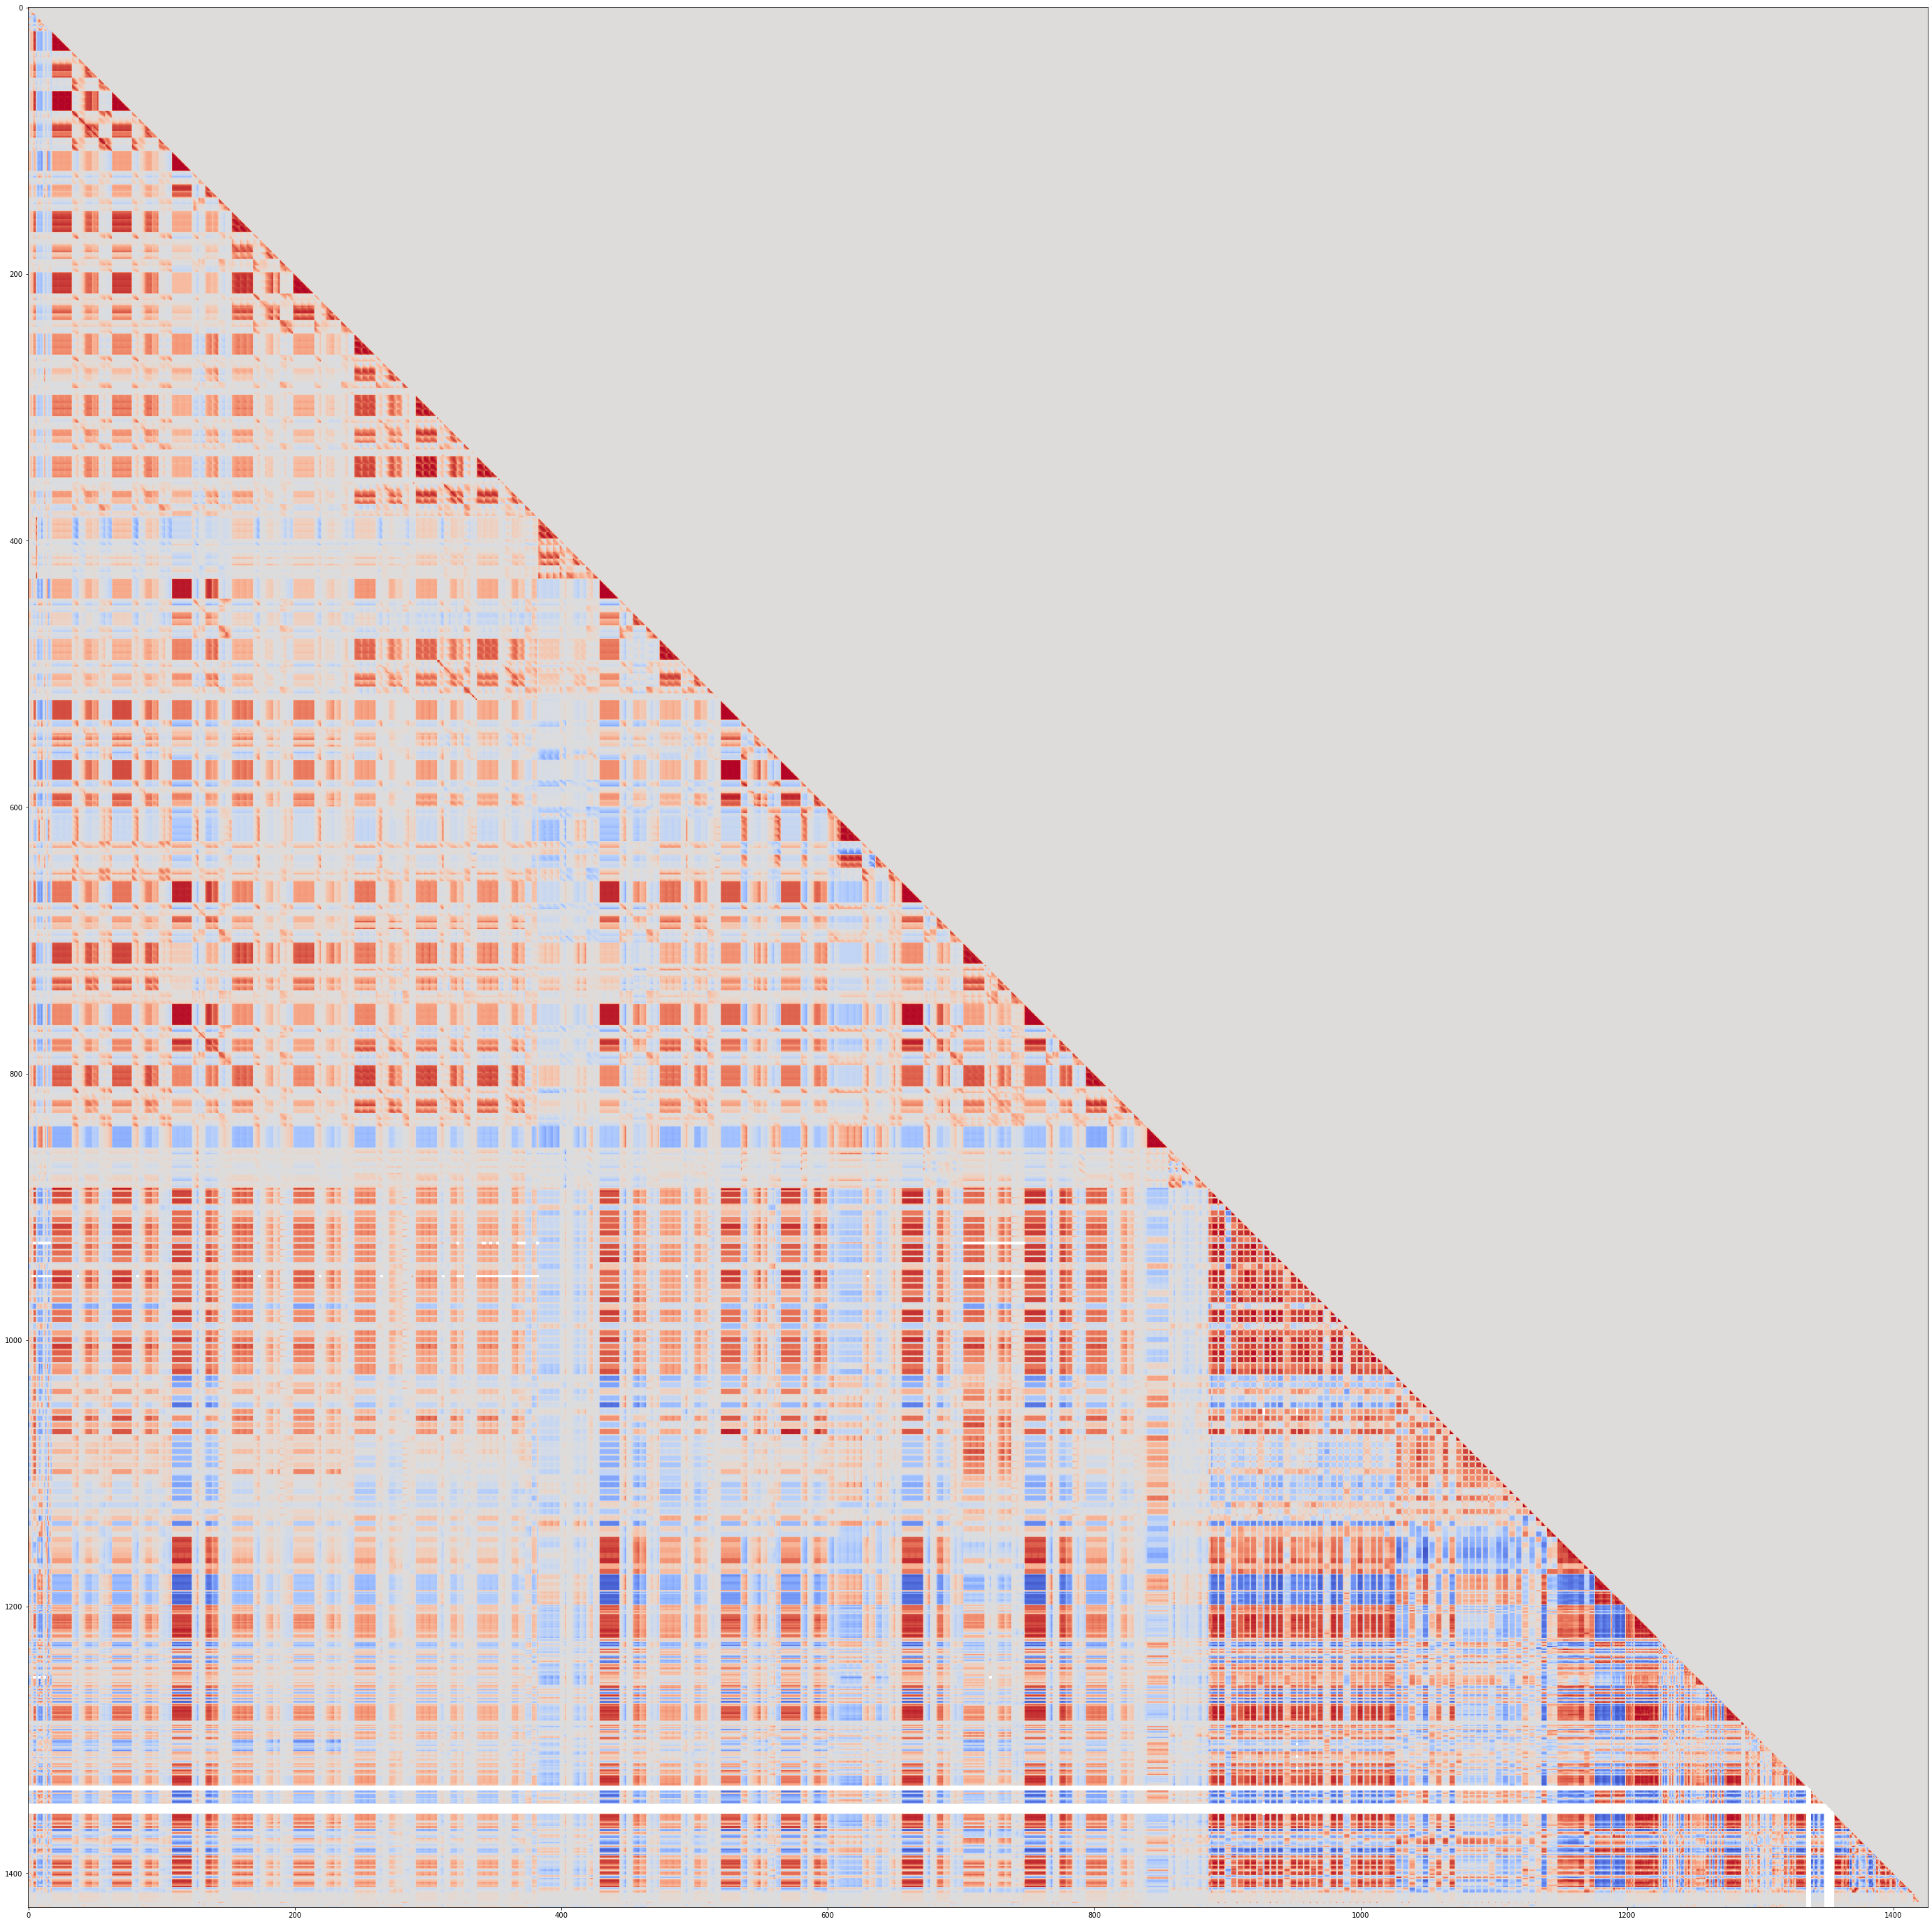

In [100]:
dp.create_correlation_plot(all_data_df.drop(columns=["date"]))

### Corrolate each feature with each other feature

In [125]:
correlation_matrix = all_data_df.corr()

In [126]:
correlation_matrix

trading_volume  trades_per_minute  volatility  \
trading_volume              1.000000           0.797847   -0.040666   
trades_per_minute           0.797847           1.000000    0.088981   
volatility                 -0.040666           0.088981    1.000000   
bid_and_ask_spread         -0.085618          -0.031311    0.116529   
bid_and_ask_sum_asks       -0.263240          -0.093968    0.241041   
...                              ...                ...         ...   
musk_percent_neut          -0.001502           0.022236    0.023125   
cos_dotw                    0.031662           0.034096    0.028494   
sin_dotw                   -0.001394          -0.006126   -0.030426   
cos_dotm                    0.146013           0.083115   -0.024559   
sin_dotm                    0.085682           0.048709    0.043862   

                      bid_and_ask_spread  bid_and_ask_sum_asks  \
trading_volume                 -0.085618             -0.263240   
trades_per_minute              -0.031311             -0.093968   
volatility                      0.116529              0.241041   
bid_and_ask_spread              1.000000              0.392237   
bid_and_ask_sum_asks            0.392237              1.000000   
...                                  ...                   ...   
musk_percent_neut               0.022013              0.105147   
cos_dotw                       -0.011904             -0.002231   
sin_dotw                       -0.002161              0.007401   
cos_dotm                        0.020070              0.066317   
sin_dotm                        0.039974              0.032130   

                      bid_and_ask_sum_bids  time_between_blocks  \
trading_volume                   -0.296786             0.089267   
trades_per_minute                -0.116165             0.053601   
volatility                        0.277751            -0.088503   
bid_and_ask_spread                0.525664            -0.126765   
bid_and_ask_sum_asks              0.842489            -0.433931   
...                                    ...                  ...   
musk_percent_neut                 0.060174            -0.010048   
cos_dotw                         -0.000902            -0.019367   
sin_dotw                          0.006534             0.016665   
cos_dotm                          0.067633            -0.015060   
sin_dotm                         -0.044400            -0.078711   

                      block_size_votes  rank_bit_x  rank_bitfinex  \
trading_volume               -0.267666    0.364839       0.180452   
trades_per_minute            -0.491711    0.279751       0.157736   
volatility                   -0.173084   -0.138906      -0.139465   
bid_and_ask_spread           -0.001901   -0.193008      -0.139122   
bid_and_ask_sum_asks         -0.304346   -0.415689      -0.460489   
...                                ...         ...            ...   
musk_percent_neut            -0.054533   -0.050093      -0.049633   
cos_dotw                     -0.012198    0.004913       0.011249   
sin_dotw                     -0.005729    0.010052       0.009839   
cos_dotm                      0.001582    0.121843      -0.004281   
sin_dotm                      0.079996    0.124446       0.183402   

                      rank_bitstamp  rank_btce  rank_coinbase  rank_itbit  \
trading_volume             0.026269  -0.003407      -0.238617    0.434808   
trades_per_minute         -0.116123  -0.010984      -0.222203    0.493882   
volatility                -0.156284  -0.003238       0.037591   -0.135870   
bid_and_ask_spread         0.009099   0.023682      -0.019949   -0.176598   
bid_and_ask_sum_asks      -0.527115  -0.274375       0.028262   -0.501118   
...                             ...        ...            ...         ...   
musk_percent_neut         -0.063073  -0.001300       0.001041   -0.044294   
cos_dotw                   0.014165   0.008211       0.021148    0.007822   
sin_dotw                   0.012957  -0.022584   

### Find the most highly correlated features

In [147]:
correlation_df = dp.get_feature_correlation_table(correlation_matrix)

In [151]:
neg_cor_df, pos_cor_df = dp.count_corr_features_over_threshold(correlation_df, threshold=0.99)

9 feature pairs had a negative correlation over -0.99
1972 feature pairs had a positive correlation over 0.99


##### Manually inspect the negatively correlated features

In [152]:
neg_cor_df.head(15)

feat_1                             feat_2  \
0       turkey_trust_in_legal_system        italy_trust_in_legal_system   
1       sweden_trust_in_legal_system      germany_trust_in_legal_system   
2       sweden_trust_in_legal_system       turkey_trust_in_legal_system   
3      germany_trust_in_legal_system        italy_trust_in_legal_system   
4  us_long_natural_unemployment_rate                    us_real_pot_gdp   
5                         us_gdp_ipd  us_long_natural_unemployment_rate   
6          us_cpi_no_food_and_energy  us_long_natural_unemployment_rate   
7  us_long_natural_unemployment_rate                         canada_cpi   
8        uk_female_healty_life_years       denmark_gdp_at_market_prices   

   correlation  
0    -1.000000  
1    -1.000000  
2    -1.000000  
3    -1.000000  
4    -0.997974  
5    -0.995631  
6    -0.994825  
7    -0.993224  
8    -0.992136

##### Manually inspect the positively correlated features

In [153]:
pos_cor_df.head(15)

feat_1  \
0                italy_trust_in_legal_system   
1              germany_trust_in_legal_system   
2   germany_harmonised_index_consumer_prices   
3                 median_transaction_fee3trx   
4                          fee_to_reward7roc   
5                             difficulty3ema   
6                             difficulty3ema   
7                             difficulty3sma   
8                              marketcap3wma   
9                                  price3ema   
10                            difficulty7ema   
11                                turkey_cpi   
12                         fee_to_reward3trx   
13                            difficulty7sma   
14                             marketcap3sma   

                                     feat_2  correlation  
0              sweden_trust_in_legal_system     1.000000  
1              turkey_trust_in_legal_system     1.000000  
2                               germany_cpi     1.000000  
3                median_transaction_fee7trx     1.000000  
4                       transactionfees7roc     0.999998  
5                            difficulty3wma     0.999991  
6                            difficulty3sma     0.999985  
7                            difficulty3wma     0.999984  
8                             marketcap3ema     0.999976  
9                                 price3wma     0.999975  
10                           difficulty7wma     0.999969  
11  turkey_harmonised_index_consumer_prices     0.999968  
12                      transactionfees3trx     0.999962  
13                           difficulty7ema     0.999962  
14                            marketcap3ema     0.999959

# --------------------------------------------------------------------------------------------------------
# 12. Add the shifted price columns
# --------------------------------------------------------------------------------------------------------

### Add a shifted price column and a shifted binary increase/decrease column to the data for each period

In [80]:
final_processed_df = dp.add_all_shifted_price_cols(all_data_df, periods_in_days)

In [81]:
final_processed_df.head()

date  trading_volume  trades_per_minute  volatility  \
0 2009-01-01             NaN                NaN         NaN   
1 2009-01-02             NaN                NaN         NaN   
2 2009-01-03             NaN                NaN         NaN   
3 2009-01-04             NaN                NaN         NaN   
4 2009-01-05             NaN                NaN         NaN   

   bid_and_ask_spread  bid_and_ask_sum_asks  bid_and_ask_sum_bids  \
0                 NaN                   NaN                   NaN   
1                 NaN                   NaN                   NaN   
2                 NaN                   NaN                   NaN   
3                 NaN                   NaN                   NaN   
4                 NaN                   NaN                   NaN   

   time_between_blocks  block_size_votes  rank_bit_x  rank_bitfinex  \
0                  NaN               NaN         NaN            NaN   
1                  NaN               NaN         NaN            NaN   
2                  NaN               NaN         NaN            NaN   
3                  NaN               NaN         NaN            NaN   
4                  NaN               NaN         NaN            NaN   

   rank_bitstamp  rank_btce  rank_coinbase  rank_itbit  rank_kraken  \
0            NaN        NaN            NaN         NaN          NaN   
1            NaN        NaN            NaN         NaN          NaN   
2            NaN        NaN            NaN         NaN          NaN   
3            NaN        NaN            NaN         NaN          NaN   
4            NaN        NaN            NaN         NaN          NaN   

   rank_mtgox  rank_okcoin  rank_others  marketcap3sma  marketcap7sma  \
0         NaN          NaN          NaN            NaN            NaN   
1         NaN          NaN          NaN            NaN            NaN   
2         NaN          NaN          NaN            NaN            NaN   
3         NaN          NaN          NaN            NaN            NaN   
4         NaN          NaN          NaN            NaN            NaN   

   marketcap14sma  marketcap30sma  marketcap90sma  marketcap3ema  \
0             NaN             NaN             NaN            NaN   
1             NaN             NaN             NaN            NaN   
2             NaN             NaN             NaN            NaN   
3             NaN             NaN             NaN            NaN   
4             NaN             NaN             NaN            NaN   

   marketcap7ema  marketcap14ema  marketcap30ema  marketcap90ema  \
0            NaN             NaN             NaN             NaN   
1            NaN             NaN             NaN             NaN   
2            NaN             NaN             NaN             NaN   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   marketcap3wma  marketcap7wma  marketcap14wma  marketcap30wma  \
0            NaN            NaN             NaN             NaN   
1            NaN            NaN             NaN             NaN   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

   marketcap90wma  marketcap3trx  marketcap7trx  marketcap14trx  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2             NaN            NaN            NaN             NaN   
3             NaN            NaN            NaN             NaN   
4             NaN            NaN            NaN             NaN   

   marketcap30trx  marketcap90trx  marketcap3mom  marketcap7mom  \
0             NaN             NaN            NaN            NaN   
1             NaN             NaN            NaN            NaN   
2             NaN             NaN            NaN            NaN   
3             NaN            

# --------------------------------------------------------------------------------------------------------
# 13. Output the fully processed data
# --------------------------------------------------------------------------------------------------------

In [82]:
final_processed_df.to_csv(os.path.join(process_directory, "full_processed_data.csv"), index=False)